# Heart Attack Prediction

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import pandas as pd

## Importing Dataset

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## Data Visualization

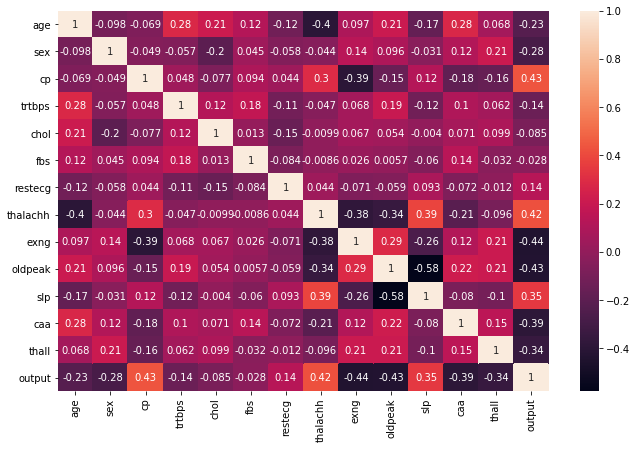

In [5]:
plt.figure(figsize=(11, 7))
sns.heatmap(df.corr(), annot=True)
plt.show()

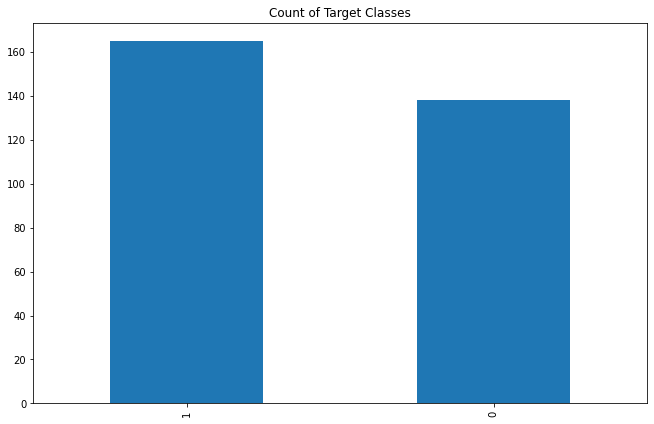

In [6]:
plt.figure(figsize=(11, 7))
df['output'].value_counts().plot(kind='bar')
plt.title('Count of Target Classes')
plt.show()

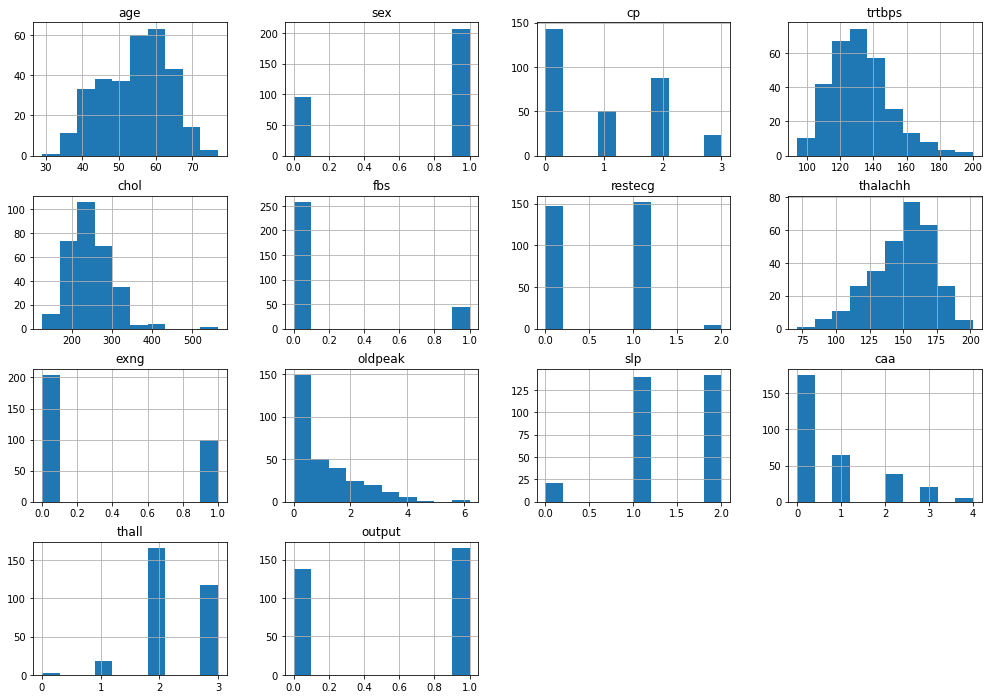

In [7]:
rcParams['figure.figsize'] = 17, 12
df.hist()
plt.show()

## Split into Features and Target Variable

In [8]:
X = df.iloc[:, :-1].values
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [9]:
y = df.iloc[:, -1].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Split into Training Set and Test Set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training Model

In [12]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

## Evaluate Model

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(f'accuracy score: {"{:.2f}".format(accuracy_score(y_test, y_pred)*100)} %')

[[24  3]
 [ 5 29]]
accuracy score: 86.89 %


### Evaluate with k-Fold Cross Validation

In [14]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print(f'accuracy: {"{:.2f}".format(accuracies.mean()*100)} %')
print(f'standard deviation: {"{:.2f}".format(accuracies.std()*100)} %')

accuracy: 83.08 %
standard deviation: 4.58 %


## Hyperparameter Tuning

In [15]:
classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [18]:
n_estimators = np.arange(10, 160, 10)
random_state = np.arange(0, 21)

In [23]:
from sklearn.model_selection import GridSearchCV
parameters = [
    {
        'n_estimators': n_estimators,
        'criterion': ['gini', 'entropy'],
        'random_state': random_state,
        'class_weight': ['balanced', 'balanced_subsample', None]
    }
]

grid_search = GridSearchCV(
    estimator=classifier,
    param_grid=parameters,
    scoring='accuracy',
    cv=10,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(f'best accuracy: {"{:.2f}".format(best_accuracy*100)} %')
print(f'best parameters: {best_parameters}')

best accuracy: 86.40 %
best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'n_estimators': 30, 'random_state': 0}


In [24]:
df_accuracy = pd.DataFrame(grid_search.cv_results_)
df_accuracy.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_n_estimators,param_random_state,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
42,0.040918,0.003255,0.003072,0.001523,balanced,gini,30,0,"{'class_weight': 'balanced', 'criterion': 'gin...",0.84,...,0.833333,0.916667,0.791667,0.875000,0.916667,0.875000,0.916667,0.864000,0.044192,1
1686,0.093783,0.008408,0.006902,0.001995,None,entropy,60,6,"{'class_weight': None, 'criterion': 'entropy',...",0.84,...,0.833333,0.916667,0.875000,0.875000,0.875000,0.875000,0.916667,0.860167,0.053158,2
1342,0.061659,0.003895,0.003968,0.002660,None,gini,40,19,"{'class_weight': None, 'criterion': 'gini', 'n...",0.84,...,0.875000,0.875000,0.875000,0.875000,0.916667,0.916667,0.916667,0.860000,0.057475,3
1182,0.223000,0.007252,0.011700,0.000458,balanced_subsample,entropy,120,6,"{'class_weight': 'balanced_subsample', 'criter...",0.84,...,0.833333,0.875000,0.833333,0.875000,0.916667,0.875000,0.916667,0.855833,0.044110,4
1888,0.229658,0.005522,0.014226,0.001960,None,entropy,150,19,"{'class_weight': None, 'criterion': 'entropy',...",0.80,...,0.833333,0.916667,0.833333,0.916667,0.875000,0.833333,0.916667,0.855833,0.044418,4
